In [30]:
import pandas as pd

In [31]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [33]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [34]:
import datetime

today = datetime.datetime.now()
data['Years_old'] = today.year - data['Year']
data.drop('Year',axis=1,inplace=True)
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


<Axes: >

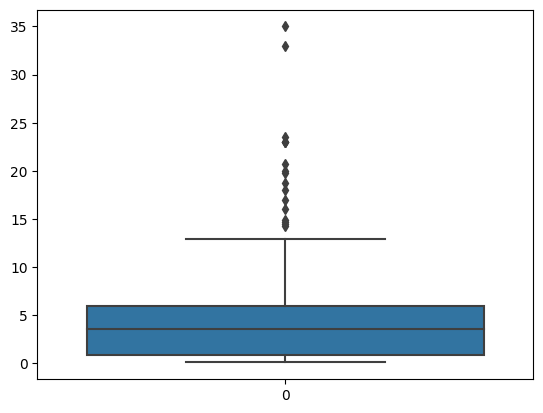

In [35]:
# Outlier identification
import seaborn as sns

sns.boxplot(data['Selling_Price'])

In [36]:
data['Selling_Price'].sort_values(ascending=False)

86     35.00
64     33.00
63     23.50
82     23.00
51     23.00
       ...  
196     0.17
197     0.16
198     0.15
199     0.12
200     0.10
Name: Selling_Price, Length: 301, dtype: float64

In [37]:
data = data[~(data['Selling_Price']> data['Selling_Price'].quantile(0.99))]
data.shape

(298, 9)

<Axes: >

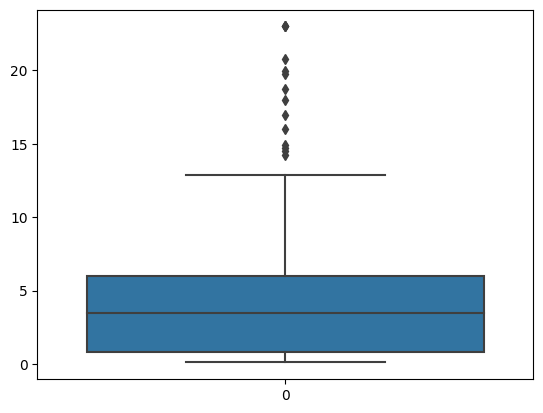

In [38]:
sns.boxplot(data['Selling_Price'])

In [39]:
data.head(5)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [40]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [41]:
# Assuming 'data' is your DataFrame
columns_to_exclude = ['Car_Name']

# Drop the column(s) you want to exclude from getting dummies
data_without_excluded_columns = data.drop(columns=columns_to_exclude)

# Create dummy variables for the remaining columns
data_with_dummies = pd.get_dummies(data_without_excluded_columns, drop_first=False)

# Now you can concatenate the excluded column(s) back to the DataFrame if needed
data_processed = pd.concat([data[columns_to_exclude], data_with_dummies], axis=1)

data = data_processed

data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,3.35,5.59,27000,0,9,False,False,True,True,False,False,True
1,sx4,4.75,9.54,43000,0,10,False,True,False,True,False,False,True
2,ciaz,7.25,9.85,6900,0,6,False,False,True,True,False,False,True
3,wagon r,2.85,4.15,5200,0,12,False,False,True,True,False,False,True
4,swift,4.60,6.87,42450,0,9,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,7,False,True,False,True,False,False,True
297,brio,4.00,5.90,60000,0,8,False,False,True,True,False,False,True
298,city,3.35,11.00,87934,0,14,False,False,True,True,False,False,True
299,city,11.50,12.50,9000,0,6,False,True,False,True,False,False,True


In [42]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [45]:
# Model Training

lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gbr.predict(X_test)
y_pred4 = xgbr.predict(X_test)

In [47]:
# Algorithm evaluation
from sklearn import metrics

score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [48]:
print(score1,score2,score3,score4)

0.7751810227763687 0.9636959327803657 0.9728354755364301 0.9638308516496423


In [49]:
scores = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
              'R2_SCORE':[score1,score2,score3,score4] })

scores = scores.sort_values(by='R2_SCORE',ascending=False)
scores

,Models,R2_SCORE
2,GBR,0.972835
3,XG,0.963831
1,RF,0.963696
0,LR,0.775181


<Axes: xlabel='Models', ylabel='R2_SCORE'>

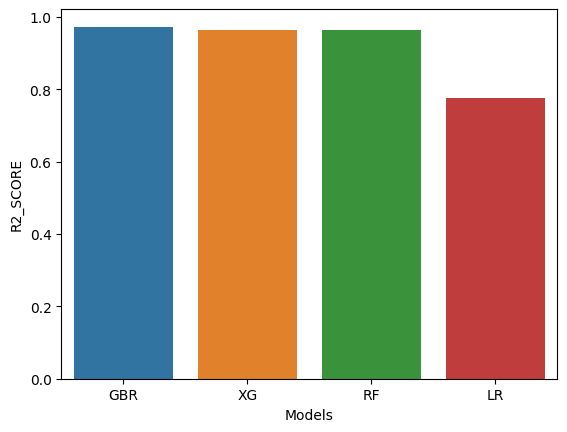

In [50]:
sns.barplot(x=scores['Models'],y=scores['R2_SCORE'])

In [51]:
# Saving Model
xgbr = XGBRegressor()
xgbr_final = xgbr.fit(X,y)

In [52]:
import joblib
joblib.dump(xg_final,'car_price_predictor')
model =joblib.load('car_price_predictor')

NameError: name 'xg_final' is not defined

In [ ]:
# Predicting on New Data

test_data = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Owner':0,
    'Years_old':8,
    'Fuel_Type_CNG':False,
    'Fuel_Type_Diesel':False, 
    'Fuel_Type_Petrol':True, 
    'Seller_Type_Dealer':True,
    'Seller_Type_Individual':False, 
    'Transmission_Automatic':False,
    'Transmission_Manual':True
},index=[0])

model.predict(test_data)

array([3.7558858], dtype=float32)

In [ ]:
xgbr_final.save_model('xgbr_model.json')